# LINEAR REGRESSION 

In this script, K-fold cross validation with ridge regression is applied in order to choose the best classification model for the cooling load. By adding different degrees of penalties to the weights in the linear regression, regularization allows us to make different models. The most appropriate choice of regularization is then made using cross-validation for model selection.

The following solves a multiclass classification problem where a discretized version of the cooling load is our target variable. 


In [17]:
import pandas as pd 
import numpy as np 
from matplotlib.pyplot import figure, plot, xlabel, ylabel, show, xlim, ylim
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [18]:

#loading the data
filename = 'data/ENB2012_data.csv'
df = pd.read_csv(filename)

#Extracting the attributes
raw_data = df.values
X = raw_data[:,:8]
attributeNames = np.asarray(df.columns[:8])

#Extracting the class labels (cooling load)
classLabels = raw_data[:,-1]

In [19]:
#Discretize the Cooling Load (CL)
nbClassCL = 4
discrete_CL = []
for cl in classLabels:
    if cl <= 20:
        discrete_CL.append('1')
    elif cl <= 30:
        discrete_CL.append('2')
    elif cl <= 40:
        discrete_CL.append('3')
    else:
        discrete_CL.append('4')


#unique class labels
classNames = np.unique(discrete_CL)

In [11]:
#Set target and data

#making a dictionary in order to assign each classlabel a unique number
classDict = {"1": 3, "2": 2, "3": 1, "4": 0}

#target vector y 
y = np.array([classDict[cl] for cl in discrete_CL])

#Scaling the data (mean = 0, std = 1)
Y = StandardScaler().fit_transform(X)

#N = data objects, M = attributes, C = number of classes
N, M = Y.shape
C = len(classNames)

### K-fold cross-validation for model selection

In [20]:

#Each lambda creates a new model 
#lambdas = np.power(10.,range(-8,3)) 
lambdas2 = np.arange(0.0001,0.02,0.0001)
S = len(lambdas2)

# K=10 fold cross-validation 
K = 10
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initializing test error matrix
Error_test = np.zeros((S,K))

k=0
for train_index, test_index in CV.split(Y):

    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]


    for i in range(S):

        ridge = Ridge(lambdas2[i])
        ridge.fit(X_train,y_train)
        

        # making predictions on test set
        y_pred_test = ridge.predict(X_test)
        Error_test[i,k] = mean_squared_error(y_test, y_pred_test)

 
        
    k+=1

#print(Error_test)




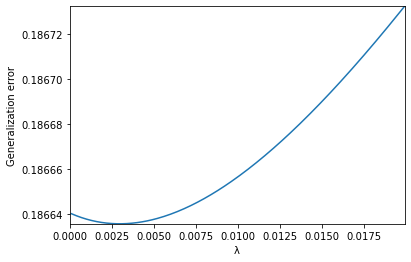

best lambda =  0.003
min error =  0.18663566814381255


In [22]:
#Plotting the generalization error as a function of lambda:

f = figure()
plot(lambdas2, Error_test.mean(1))
xlabel('λ')
xlim(0,np.max(lambdas2))
ylim(np.min(Error_test.mean(1)),np.max(Error_test.mean(1)))
ylabel('Generalization error')
    
show()

print( "best lambda = ", lambdas2[np.argmin(Error_test.mean(1))] )
print( "min error = ", np.min(Error_test.mean(1)) )
